In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [16]:
df = pd.read_csv("C:/Users/Admin/Downloads/archive (4)/Social_Network_Ads.csv")

In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [25]:
x = df.iloc[:,[2,3]]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
regression = LogisticRegression()

In [27]:
regression.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = regression.predict(x_test)

In [29]:
regression.score(x_test, y_test)

0.9125

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2958039891549808

In [31]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

MSE:  0.0875


In [32]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [33]:
TP = cm[0][0]
TN = cm[0][1]
FP = cm[1][0]
FN = cm[1][1]

print('TP',TP)
print('FN',FN)
print('TN',TN)
print('FP',FP)

TP 56
FN 17
TN 2
FP 5


In [34]:
accuracy = TP+TN/(TP+FN+TN+FP)
error_rate = FP+FN/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("Accuracy",accuracy)
print("Error Rate",error_rate)
print("Precision",precision)
print("Recall",recall)

Accuracy 56.025
Error Rate 5.2125
Precision 0.9180327868852459
Recall 0.7671232876712328


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

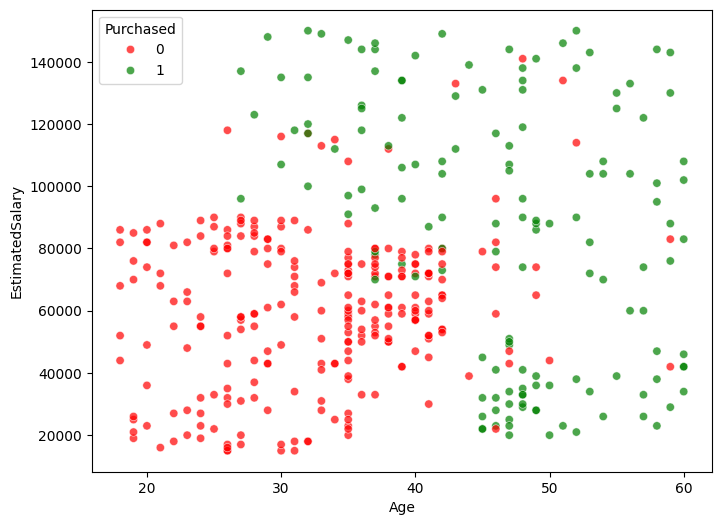

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Age', y ='EstimatedSalary', hue = 'Purchased', data=df, palette=["red","green"], alpha = 0.7)